In [ ]:
#                                                     بسم الله الرحمن الرحيم                                                 
#  program: KickStart.cpp 
#  Description: Student Performance Insights Challenge DEPI X EYOUTH
#  Author:  Abdallah Gasem
#  Contact: ag.ellsayed@gmail.com   
#  last modified: 28-02-2025
#  Presentaion Link: https://drive.google.com/drive/folders/1hFrgCDPZypQTptaKaETvpeyfE_F0D6fp?usp=sharing
#  Version: 1.1

# **Student Performance and Behaviour Analysis**

#### This notebook aims to analyze student performance data to uncover valuable insights that can contribute to improving academic outcomes. The process involves data cleaning, trend analysis, visualization, and deriving actionable insights to better understand the factors influencing student success.


# **Table of Contents**

- [1. Data Exploration](#1-data-exploration)
    - [1.1 General Feel](#11-general-feel)
    - [1.2 Identifying Missing Values & Duplicates](#12-identifying-missing-values--duplicates)
        - [1.2.1 Missing Values](#121-missing-values)
        - [1.2.2 Duplicates](#122-duplicates)
    - [1.3 Data Distribution](#13-data-distribution)
        - [1.3.1 Numerical Data](#131-numerical-data)
        - [1.3.2 Categorical Data](#132-categorical-data)
        - [1.3.3 Boolean Data](#133-boolean-data)
- [2. Data Cleaning](#2-data-cleaning)
    - [2.1 Columns Manipulation](#21-columns-manipulation)
    - [2.2 Handling Missing Values](#22-handling-missing-values)
        - [2.2.1 Handling Missing Values For Parent_Education_Level](#221-handling-missing-values-for-parent_education_level)
        - [2.2.2 Handling Missing Values For Assignments_Avg](#222-handling-missing-values-for-assignments_avg)
        - [2.2.3 Handling Missing Values For Attendance (%)](#223-handling-missing-values-for-attendance-)
    - [2.3 Handling Outliers](#23-handling-outliers)
- [3. Feature Engineering](#3-feature-engineering)
- [4. Correlation Analysis](#4-correlation-analysis)
- [5. Key Questions to Answer](#5-key-questions-to-answer)
    - [5.1 Academic Performance](#51-academic-performance)
    - [5.2 Behavioral and Lifestyle Factors](#52-behavioral-and-lifestyle-factors)
    - [5.3 Extracurricular and Environmental Factors](#53-extracurricular-and-environmental-factors)
    - [5.4 Parental and Socioeconomic Factors](#54-parental-and-socioeconomic-factors)
    - [5.5 Department and Demographic Factors](#55-department-and-demographic-factors)
- [6. Actionable Insights](#6-actionable-insights)
- [Summary](#summary)


In [6]:
# Gearing Up!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)  # show all the columns

studs_data = pd.read_csv(r"E:\DEPI\Technical\DEPI\Eyouth-Challenge\Student-Performance-Analysis\Dataset\Students_Grading_Dataset.csv")
studs_df = pd.DataFrame(studs_data)

studs_df  # testing


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,NaN,94.24,8.32,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,Business,NaN,82.15,60.33,80.09,99.32,5.00,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Business,65.11,86.31,49.80,NaN,88.08,2.79,60.87,95.96,C,5.0,No,Yes,NaN,Medium,4,4.0
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,87.54,63.55,64.21,94.28,50.19,3.13,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3
4998,S5998,Sara,Davis,student4998@university.com,Male,23,CS,92.56,79.79,94.28,81.20,61.18,0.40,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4


## **1. Data Exploration**

<p><b>Metadata</b></p>
<table style="width:45%; float:left; margin-right:5%;">
    <thead>
        <tr>
            <th>Column</th>
            <th>Type</th>
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Student_ID</td>
            <td>String</td>
            <td>Unique identifier for each student</td>
        </tr>
        <tr>
            <td>First_Name</td>
            <td>String</td>
            <td>Student’s first name</td>
        </tr>
        <tr>
            <td>Last_Name</td>
            <td>String</td>
            <td>Student’s last name</td>
        </tr>
        <tr>
            <td>Email</td>
            <td>String</td>
            <td>Contact email (can be anonymized)</td>
        </tr>
        <tr>
            <td>Gender</td>
            <td>Categorical</td>
            <td>Male, Female, Other</td>
        </tr>
        <tr>
            <td>Age</td>
            <td>Integer</td>
            <td>Age of the student</td>
        </tr>
        <tr>
            <td>Department</td>
            <td>String</td>
            <td>Student's department (e.g., CS, Engineering, Business)</td>
        </tr>
        <tr>
            <td>Attendance (%)</td>
            <td>Float</td>
            <td>Attendance percentage (0-100%)</td>
        </tr>
        <tr>
            <td>Midterm_Score</td>
            <td>Float</td>
            <td>Midterm exam score (out of 100)</td>
        </tr>
        <tr>
            <td>Final_Score</td>
            <td>Float</td>
            <td>Final exam score (out of 100)</td>
        </tr>
        <tr>
            <td>Assignments_Avg</td>
            <td>Float</td>
            <td>Average score of all assignments (out of 100)</td>
        </tr>
        <tr>
            <td>Quizzes_Avg</td>
            <td>Float</td>
            <td>Average quiz scores (out of 100)</td>
        </tr>
    </tbody>
</table>

<table style="width:45%; float:left;">
    <thead>
        <tr>
            <th>Column</th>
            <th>Type</th>
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Participation_Score</td>
            <td>Float</td>
            <td>Score based on class participation (0-10)</td>
        </tr>
        <tr>
            <td>Projects_Score</td>
            <td>Float</td>
            <td>Project evaluation score (out of 100)</td>
        </tr>
        <tr>
            <td>Total_Score</td>
            <td>Float</td>
            <td>Weighted sum of all grades</td>
        </tr>
        <tr>
            <td>Grade</td>
            <td>Categorical</td>
            <td>Letter grade (A, B, C, D, F)</td>
        </tr>
        <tr>
            <td>Study_Hours_per_Week</td>
            <td>Float</td>
            <td>Average study hours per week</td>
        </tr>
        <tr>
            <td>Extracurricular_Activities</td>
            <td>Boolean</td>
            <td>Whether the student participates in extracurriculars (Yes/No)</td>
        </tr>
        <tr>
            <td>Internet_Access_at_Home</td>
            <td>Boolean</td>
            <td>Does the student have access to the internet at home? (Yes/No)</td>
        </tr>
        <tr>
            <td>Parent_Education_Level</td>
            <td>Categorical</td>
            <td>Highest education level of parents (None, High School, Bachelor's, Master's, PhD)</td>
        </tr>
        <tr>
            <td>Family_Income_Level</td>
            <td>Categorical</td>
            <td>Low, Medium, High</td>
        </tr>
        <tr>
            <td>Stress_Level (1-10)</td>
            <td>Integer</td>
            <td>Self-reported stress level (1: Low, 10: High)</td>
        </tr>
        <tr>
            <td>Sleep_Hours_per_Night</td>
            <td>Float</td>
            <td>Average hours of sleep per night</td>
        </tr>
    </tbody>
</table>


##### 📌 **Initial Observation:** At first glance, the Email & Student Id columns does not contribute to the analysis and can be considered for removal in the data cleaning phase. Additionally, the First_Name and Last_Name columns could be combined into a single Name column to reduce redundancy

In [7]:
studs_df.columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

### **1.1 General Feel**

In [8]:
studs_df.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,4484.000000,5000.000000,5000.000000,4483.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,21.048400,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,17.658860,5.48080,6.488140
std,1.989786,14.372446,17.213209,17.238744,14.411799,14.504281,2.890136,14.423415,14.399941,7.275864,2.86155,1.452283
min,18.000000,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,5.000000,1.00000,4.000000
25%,19.000000,63.265000,55.457500,54.667500,62.090000,62.490000,2.440000,62.320000,62.835000,11.400000,3.00000,5.200000
50%,21.000000,75.725000,70.510000,69.735000,74.810000,74.695000,4.955000,74.980000,75.395000,17.500000,5.00000,6.500000
75%,23.000000,87.472500,84.970000,84.500000,86.970000,87.630000,7.500000,87.367500,87.652500,24.100000,8.00000,7.700000
max,24.000000,100.000000,99.980000,99.980000,99.980000,99.960000,10.000000,100.000000,99.990000,30.000000,10.00000,9.000000


In [9]:
studs_df.describe(include="all")

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000,5000,5000,5000,5000,5000.000000,5000,4484.000000,5000.000000,5000.000000,4483.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000.000000,5000,5000,3206,5000,5000.00000,5000.000000
unique,5000,8,6,5000,2,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,2,2,4,3,NaN,NaN
top,S1000,Maria,Johnson,student0@university.com,Male,NaN,CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,No,Yes,PhD,Low,NaN,NaN
freq,1,657,868,1,2551,NaN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1495,NaN,3493,4485,820,1983,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,21.048400,NaN,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,NaN,17.658860,NaN,NaN,NaN,NaN,5.48080,6.488140
std,NaN,NaN,NaN,NaN,NaN,1.989786,NaN,14.372446,17.213209,17.238744,14.411799,14.504281,2.890136,14.423415,14.399941,NaN,7.275864,NaN,NaN,NaN,NaN,2.86155,1.452283
min,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,NaN,5.000000,NaN,NaN,NaN,NaN,1.00000,4.000000
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,63.265000,55.457500,54.667500,62.090000,62.490000,2.440000,62.320000,62.835000,NaN,11.400000,NaN,NaN,NaN,NaN,3.00000,5.200000
50%,NaN,NaN,NaN,NaN,NaN,21.000000,NaN,75.725000,70.510000,69.735000,74.810000,74.695000,4.955000,74.980000,75.395000,NaN,17.500000,NaN,NaN,NaN,NaN,5.00000,6.500000
75%,NaN,NaN,NaN,NaN,NaN,23.000000,NaN,87.472500,84.970000,84.500000,86.970000,87.630000,7.500000,87.367500,87.652500,NaN,24.100000,NaN,NaN,NaN,NaN,8.00000,7.700000


### **1.2 Identfying Missing values & Duplicates**

#### **1.2.1 Missing Values**

##### 📌 **Initial Observation:** the Attendance (%) column got 516 (10.32%) missing values , the Assignments_Avg column got 517 (10.34%) missing values and Parent_Education_Level got 1794 (35.88%) missing values! which raise the following questions

- Is there a pattern in the missing values?
- Are the missing values concentrated in a specific grade level, school, or demographic group?
- Why might these data be missing?
- Should missing data points be imputed, or does it indicate an important trend?
- Does missing attendance correlate with lower academic performance or other factors?
- Should we assume zero attendance for missing values, or is a different approach needed?
- in case of Parent_Education_Level Should we introduce a category like "Unknown" or "Not Reported"?
- is the missing values for Attendence (%) and Assignments_Avg belong to the same students? 
- are these missing values across all the three columns intersect? or distinct?

Note: The high percentage of missing values in case of Parent_Education_Level suggests that this information may be optional or sensitive. Further analysis is needed!

In [10]:
studs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [11]:
print(studs_df.isna().sum())
print(studs_df.shape)

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64
(5000, 23)


In [12]:
# the percentage of missing values for each feature
(studs_df.isna().sum() / 5000) * 100

Student_ID                     0.00
First_Name                     0.00
Last_Name                      0.00
Email                          0.00
Gender                         0.00
Age                            0.00
Department                     0.00
Attendance (%)                10.32
Midterm_Score                  0.00
Final_Score                    0.00
Assignments_Avg               10.34
Quizzes_Avg                    0.00
Participation_Score            0.00
Projects_Score                 0.00
Total_Score                    0.00
Grade                          0.00
Study_Hours_per_Week           0.00
Extracurricular_Activities     0.00
Internet_Access_at_Home        0.00
Parent_Education_Level        35.88
Family_Income_Level            0.00
Stress_Level (1-10)            0.00
Sleep_Hours_per_Night          0.00
dtype: float64

In [13]:
# Calculate correlation
studs_df[["Attendance (%)", "Assignments_Avg"]].corr()

,Attendance (%),Assignments_Avg
Attendance (%),1.000000,-0.037872
Assignments_Avg,-0.037872,1.000000


#### **1.2.2 Duplicates**

##### 📌 **Initial Observation:** zero duplicate rows in the dataset

In [14]:
studs_df.duplicated().sum()

np.int64(0)

### **1.3 Data Distrbution**

#### **1.3.1 Numerical Data**

##### 📌 **Initial Observation:** observed that the data is well distributed within its minimum and maximum values, suggesting a natural spread without extreme deviations. While this indicates a lower likelihood of significant outliers, further statistical analysis (e.g., box plots or z-scores) will help confirm their presence

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attendance (%)'}>,
        <Axes: title={'center': 'Midterm_Score'}>],
       [<Axes: title={'center': 'Final_Score'}>,
        <Axes: title={'center': 'Assignments_Avg'}>,
        <Axes: title={'center': 'Quizzes_Avg'}>],
       [<Axes: title={'center': 'Participation_Score'}>,
        <Axes: title={'center': 'Projects_Score'}>,
        <Axes: title={'center': 'Total_Score'}>]], dtype=object)

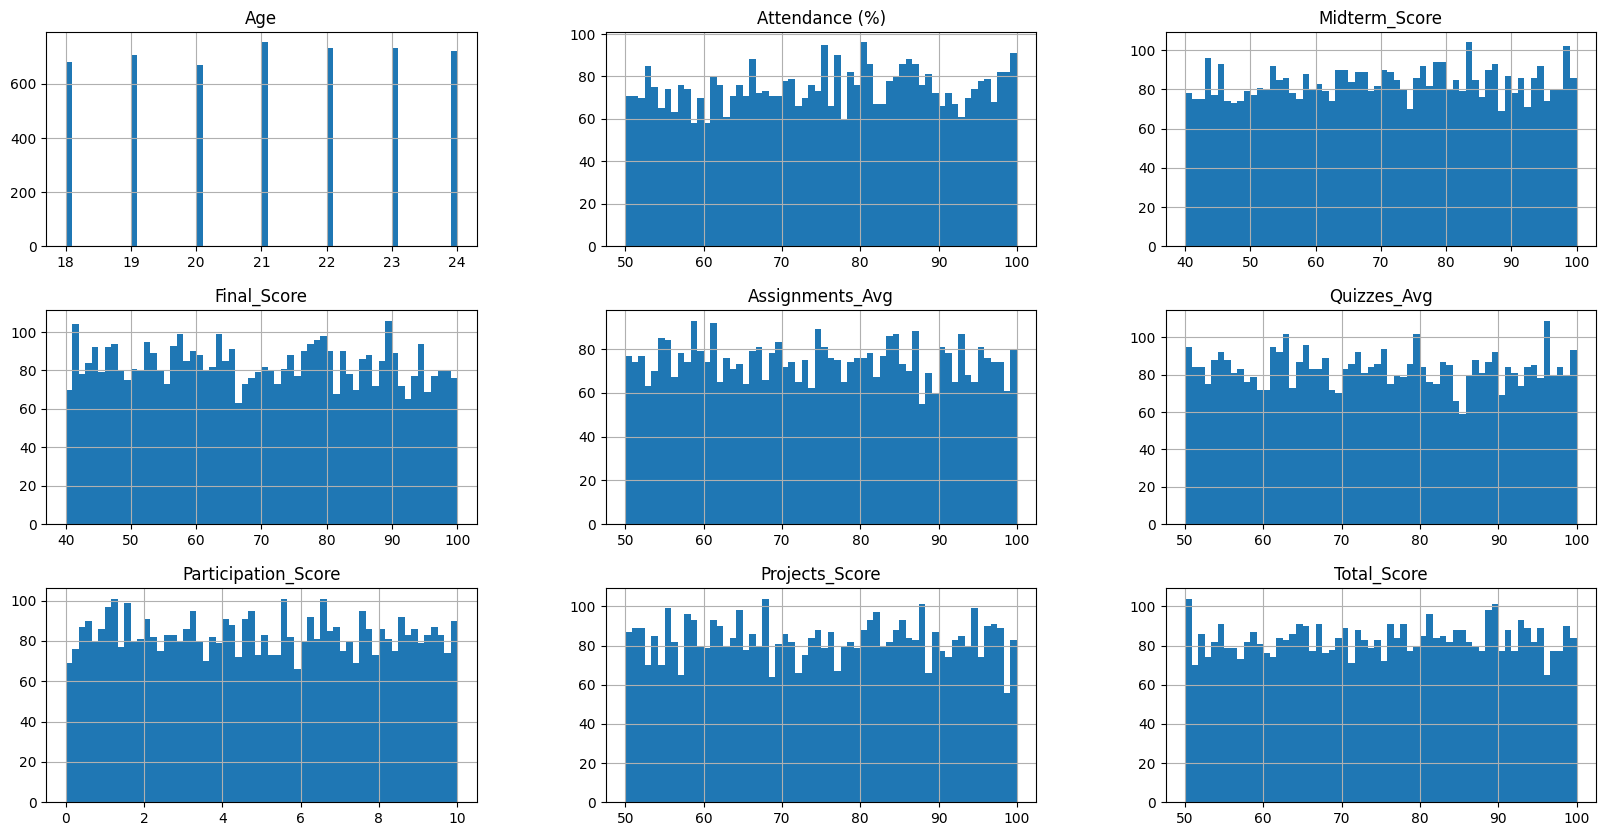

In [15]:
# Numericals Distrbutions
studs_df_nums = studs_df.loc[:,['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score']]

studs_df_nums.hist(bins=60, figsize=(20,10))

##### 📌 **Initial Observation:** student-reported stress levels reveals that 59.3% of students selected a stress level between 5 and 10, indicating that a majority experience moderate to high stress. This suggests that stress management may be a key factor influencing student performance and well-being

Stress_Level (1-10)
1     489
2     504
3     509
4     533
5     495
6     481
7     489
8     524
9     488
10    488
Name: count, dtype: int64


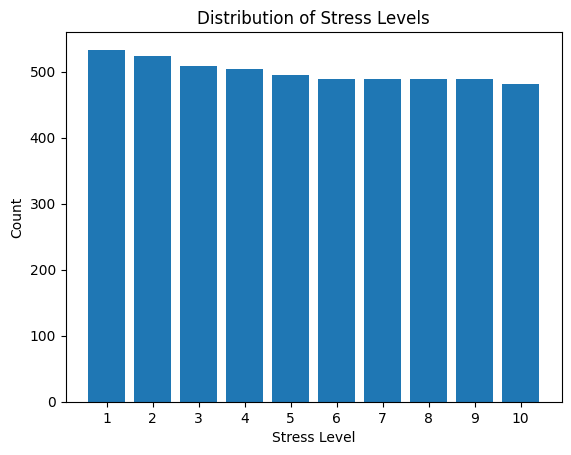

In [16]:
# other features 
print(studs_df["Stress_Level (1-10)"].value_counts().sort_index())

stress_lvl = [1,2,3,4,5,6,7,8,9,10]

plt.bar(stress_lvl, studs_df["Stress_Level (1-10)"].value_counts(), tick_label=stress_lvl)
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.title('Distribution of Stress Levels')
plt.show()

#### **1.3.2 Categorical Data**

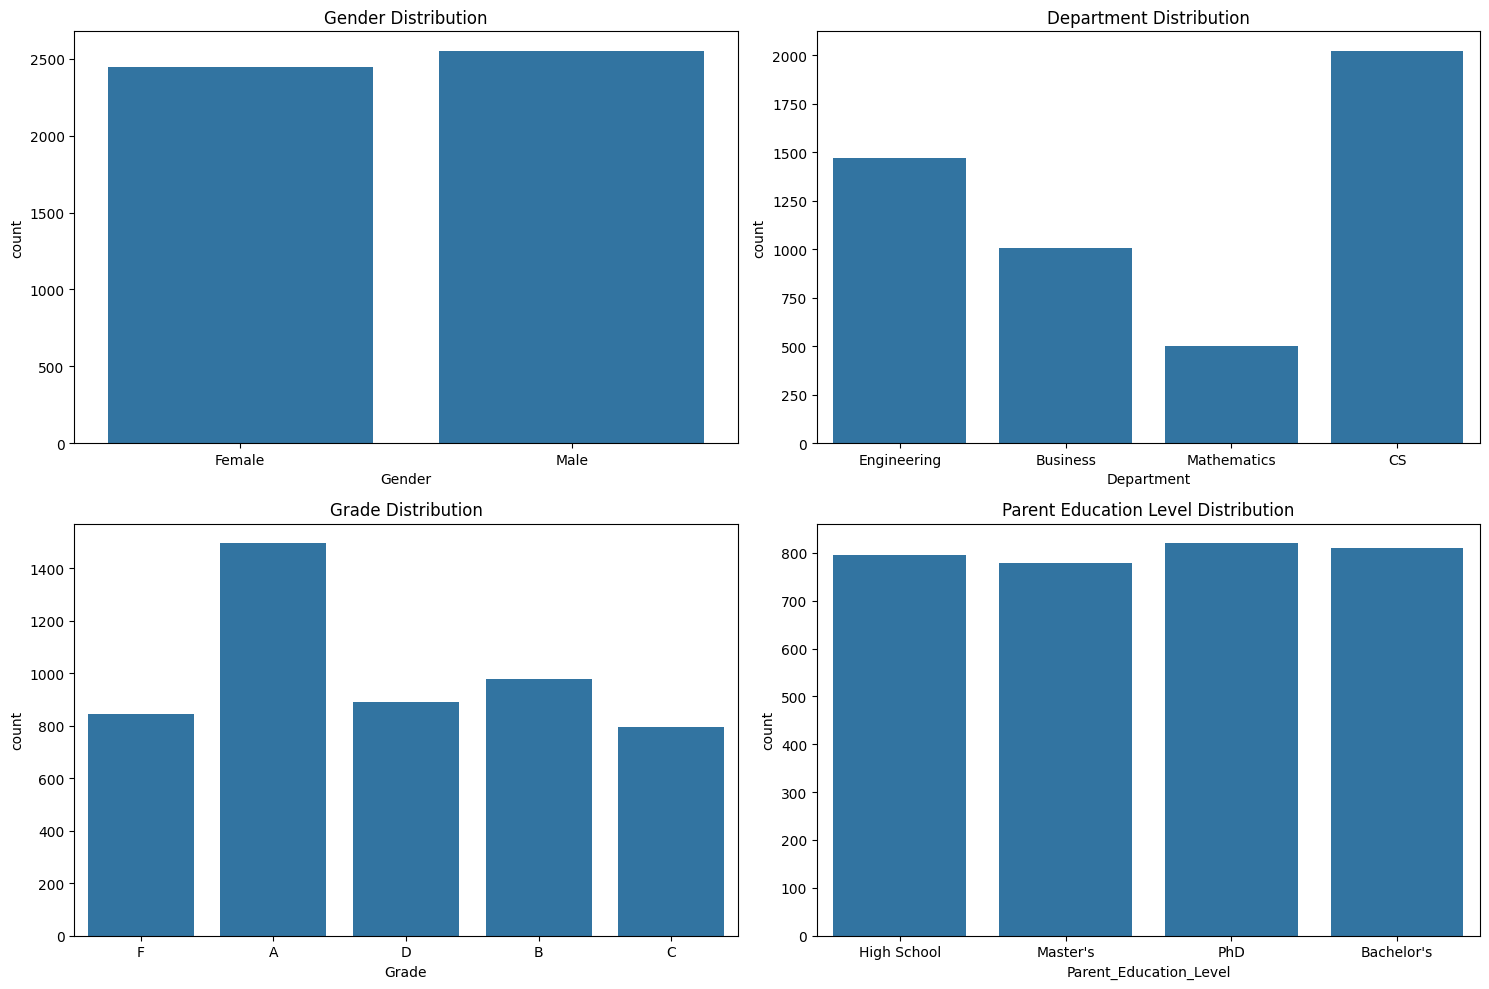

In [17]:
# Categorical Data
studs_df_cats = studs_df.loc[:,['Gender', 
       'Department','Grade', 'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level']]

# Plotting categorical data using bar plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(ax=axes[0, 0], x='Gender', data=studs_df_cats)
axes[0, 0].set_title('Gender Distribution')

sns.countplot(ax=axes[0, 1], x='Department', data=studs_df_cats)
axes[0, 1].set_title('Department Distribution')

sns.countplot(ax=axes[1, 0], x='Grade', data=studs_df_cats)
axes[1, 0].set_title('Grade Distribution')

sns.countplot(ax=axes[1, 1], x='Parent_Education_Level', data=studs_df_cats)
axes[1, 1].set_title('Parent Education Level Distribution')

plt.tight_layout()
plt.show()

#### **1.3.3 Boolean Data**

##### 📌 69.96% of the students Does not Participate in any Extracurricular Activities. And there are about 515 student that do not have any internet access at their homes so they would require a special attention when evaluating their performance

In [18]:
studs_df_bools = studs_df[["Extracurricular_Activities", "Internet_Access_at_Home"]]
studs_df_bools.apply(pd.Series.value_counts)

,Extracurricular_Activities,Internet_Access_at_Home
No,3493,515
Yes,1507,4485


## **2. Data Cleaning**

### **2.1 Columns Manipulation**

##### 📌 we did observe while exploring the data that the Email & Student_ID columns does not contribute to the analysis and can be considered for removal in the data cleaning phase. we did also mention that  the First_Name and Last_Name columns could be combined into a single Name column to reduce redundancy so thats what we are gonna do:
- Remove the columns that are unrevelant to the Analysis `Email` & `Student_ID`
- Combine First and Last Name into a New Column Called `Name` and remove the 2 columns

In [19]:
# Drop the Useless Cols
studs_df_cleaning = studs_df.drop(columns=["Student_ID","Email"], axis=1)

# Combine First_Name and Last_Name into a column called 'Name' then removing the 2 cols
studs_df_cleaning["Name"] =  studs_df_cleaning["First_Name"] +" "+studs_df_cleaning["Last_Name"]

# removing the First_Name & Last_Name Cols to reduce Redunduncy
studs_df_cleaning.drop(columns=["First_Name","Last_Name"], inplace=True)
studs_df_cleaning

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Name
0,Female,22,Engineering,52.29,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7,Omar Williams
1,Male,18,Engineering,97.27,97.23,45.80,NaN,94.24,8.32,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0,Maria Brown
2,Male,24,Business,57.19,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2,Ahmed Jones
3,Female,24,Mathematics,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7,Omar Williams
4,Female,23,CS,54.18,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1,John Smith
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Male,19,Business,NaN,82.15,60.33,80.09,99.32,5.00,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3,Ahmed Jones
4996,Male,19,Business,65.11,86.31,49.80,NaN,88.08,2.79,60.87,95.96,C,5.0,No,Yes,NaN,Medium,4,4.0,Emma Brown
4997,Female,24,CS,87.54,63.55,64.21,94.28,50.19,3.13,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3,John Brown
4998,Male,23,CS,92.56,79.79,94.28,81.20,61.18,0.40,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4,Sara Davis


##### 🔍 **Observation:** There are Some data that are not so logical like assigning A "male" To "Maria Brown" at the 2nd row and "Female" to "Omar Williams" in the 1st row! this is repeated across all the data point. Needs Further Investegation Weather To remove these cols Or leave them anyways they wont provide significant Contribution to our Analysis.

#### 💡 **Action:** we are going to drop these columns because they are identifiers & They don’t hold numerical or categorical significance 

In [20]:
studs_df_cleaning.drop(columns = "Name", inplace=True)
studs_df_cleaning

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,Female,22,Engineering,52.29,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,Male,18,Engineering,97.27,97.23,45.80,NaN,94.24,8.32,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,Male,24,Business,57.19,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,Female,24,Mathematics,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,Female,23,CS,54.18,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Male,19,Business,NaN,82.15,60.33,80.09,99.32,5.00,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3
4996,Male,19,Business,65.11,86.31,49.80,NaN,88.08,2.79,60.87,95.96,C,5.0,No,Yes,NaN,Medium,4,4.0
4997,Female,24,CS,87.54,63.55,64.21,94.28,50.19,3.13,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3
4998,Male,23,CS,92.56,79.79,94.28,81.20,61.18,0.40,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4


### **2.2 Handling Missing Values**

##### 📌 We did observe that we have Missing Values in 'Attendance (%)' by 10.32%, Assignments_Avg by 10.34% and Parent_Education_Level by 32.88%. So now we are going to take actions regarding these Values

#### **2.2.1 Handling Missing Values For Parent_Education_Level**

##### 🔍 Examining the Null Records

In [21]:
studs_df_PEL_na = studs_df_cleaning[studs_df_cleaning["Parent_Education_Level"].isna()]
studs_df_PEL_na

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
1,Male,18,Engineering,97.27,97.23,45.80,NaN,94.24,8.32,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
6,Male,24,Business,57.60,66.26,89.07,84.52,98.40,2.30,93.65,83.21,F,21.3,No,Yes,NaN,Low,5,6.4
7,Male,19,Engineering,51.91,45.67,73.96,80.12,95.90,3.73,93.24,81.93,F,27.3,Yes,No,NaN,Medium,4,4.3
9,Female,22,Engineering,64.01,87.96,98.47,96.98,55.63,5.88,78.60,84.99,A,9.6,No,Yes,NaN,Medium,10,6.4
13,Male,18,Business,96.61,40.64,93.14,66.78,56.82,4.37,81.48,77.93,A,22.8,No,Yes,NaN,Medium,10,7.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,Female,19,Engineering,NaN,59.39,80.37,58.01,97.43,2.83,96.74,63.42,A,13.5,No,Yes,NaN,Low,5,6.4
4990,Male,24,CS,80.53,87.83,43.70,69.29,69.46,1.84,65.16,81.18,F,15.2,No,Yes,NaN,Low,7,7.1
4991,Female,20,Engineering,55.54,59.68,63.09,NaN,56.92,2.32,81.30,89.55,D,18.8,Yes,Yes,NaN,Low,5,6.8
4993,Female,22,Business,99.21,60.16,59.18,59.74,63.01,2.70,69.56,85.86,A,16.9,No,Yes,NaN,Low,2,7.8


##### 🔍 As iam trying to find a pattern Between these Missing Values we would Notice that these missing values are not associated with a specific Income Rate for example the Lower Income Category therefore, These data Could Be Missing at Random Or Randomly Missing. Since income level doesn't explain the missing values, it's unlikely that imputing based on income would be a good strategy.

In [22]:
studs_df_PEL_na["Family_Income_Level"].value_counts()

Family_Income_Level
Low       729
Medium    687
High      378
Name: count, dtype: int64

##### 💡 **Acion:** we are going to introduce a new Category "Not Provided" because the missingness isn’t concentrated in one income group, meaning it doesn’t introduce bias toward any specific economic class.

In [23]:
studs_df_cleaning["Parent_Education_Level"].fillna("Not Provided", inplace=True)

C:\Users\Click\AppData\Local\Temp\ipykernel_9624\2934135130.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  studs_df_cleaning["Parent_Education_Level"].fillna("Not Provided", inplace=True)


#### **2.2.2 Handling Missing Values For Assignments_Avg**

##### 🔍 Examining the Null Records

In [24]:
studs_df_AssignAvg_na = studs_df_cleaning[studs_df_cleaning["Assignments_Avg"].isna()]
studs_df_AssignAvg_na

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
1,Male,18,Engineering,97.27,97.23,45.80,NaN,94.24,8.32,55.65,50.64,A,19.0,No,Yes,Not Provided,Medium,4,9.0
20,Male,18,CS,77.13,69.94,46.70,NaN,84.38,7.72,74.07,88.47,D,16.9,No,Yes,High School,Medium,2,8.1
55,Female,19,Business,81.75,52.50,50.77,NaN,97.27,7.79,81.44,88.76,A,5.1,No,Yes,Not Provided,Medium,2,7.4
61,Male,19,CS,82.34,94.72,93.70,NaN,79.49,6.06,57.93,88.60,B,22.0,No,Yes,Not Provided,Low,3,4.8
76,Female,21,Engineering,70.77,70.22,66.31,NaN,62.41,5.81,56.51,58.85,A,26.7,No,Yes,Not Provided,High,1,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,Male,19,CS,93.16,85.05,99.24,NaN,80.59,9.33,74.52,54.35,B,10.6,No,Yes,Master's,Medium,7,5.2
4985,Female,18,CS,51.41,81.72,71.21,NaN,66.87,1.08,79.30,70.75,D,25.2,No,Yes,Bachelor's,High,6,4.2
4991,Female,20,Engineering,55.54,59.68,63.09,NaN,56.92,2.32,81.30,89.55,D,18.8,Yes,Yes,Not Provided,Low,5,6.8
4992,Male,18,CS,NaN,61.44,64.59,NaN,50.11,3.53,80.08,62.51,A,23.3,Yes,No,High School,Medium,1,6.2


##### 🔍 Analyzing the Correlation of Assignments_Avg with the Other numerical features to decide what type of Imputation should we go with. the Correlation Analysis shows weak realationship between Assignments_Avg and other Numericals, the highest Correlation was `Study_Hours_per_Week 0.022166` which still which is still extremely weak.

In [25]:
numerical_features = ['Age','Assignments_Avg', 'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score', 'Study_Hours_per_Week', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']
correlation = studs_df_cleaning[numerical_features].corr()
correlation['Assignments_Avg']

Age                     -0.033268
Assignments_Avg          1.000000
Attendance (%)          -0.037872
Midterm_Score           -0.007364
Final_Score              0.010692
Quizzes_Avg              0.007264
Participation_Score      0.013872
Projects_Score           0.007013
Total_Score              0.000588
Study_Hours_per_Week     0.023342
Stress_Level (1-10)      0.011542
Sleep_Hours_per_Night    0.018564
Name: Assignments_Avg, dtype: float64

##### 💡 **Action:** we can impute this values using statistical methods either the mean or the median but iam gonna go with the `median` as it is will be more safer (Insenstive) regarding outliers (although we are not expecting Extreme values from what we saw in the initial Observations)

In [26]:
studs_df_cleaning.fillna({"Assignments_Avg": studs_df_cleaning["Assignments_Avg"].median()}, inplace=True)
studs_df_cleaning

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,Female,22,Engineering,52.29,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,Male,18,Engineering,97.27,97.23,45.80,74.81,94.24,8.32,55.65,50.64,A,19.0,No,Yes,Not Provided,Medium,4,9.0
2,Male,24,Business,57.19,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,Female,24,Mathematics,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,Female,23,CS,54.18,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Male,19,Business,NaN,82.15,60.33,80.09,99.32,5.00,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3
4996,Male,19,Business,65.11,86.31,49.80,74.81,88.08,2.79,60.87,95.96,C,5.0,No,Yes,Not Provided,Medium,4,4.0
4997,Female,24,CS,87.54,63.55,64.21,94.28,50.19,3.13,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3
4998,Male,23,CS,92.56,79.79,94.28,81.20,61.18,0.40,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4


#### **2.2.3 Handling Missing Values For Attendence (%)**

##### 📌 Taking the same approach we did with the Assignments_Avg 

##### 🔍 Examining the Null Records

In [27]:
studs_df_Att_na = studs_df_cleaning[studs_df_cleaning["Attendance (%)"].isna()]
studs_df_Att_na

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
5,Male,21,Engineering,NaN,78.85,43.53,71.40,52.20,6.38,67.29,62.08,B,8.5,Yes,Yes,PhD,High,1,5.0
32,Female,21,CS,NaN,61.59,98.60,93.06,61.09,8.21,55.65,51.99,D,28.9,No,Yes,Not Provided,Medium,9,4.4
46,Male,24,CS,NaN,69.91,44.14,77.41,87.63,1.98,96.58,82.90,C,13.5,No,Yes,Master's,Low,5,8.6
54,Male,19,Business,NaN,52.45,85.21,93.65,61.64,8.66,92.48,82.55,B,5.3,No,Yes,High School,Medium,8,6.8
81,Female,23,CS,NaN,87.98,42.12,70.51,55.98,1.61,77.46,72.43,D,10.8,No,Yes,Master's,Low,1,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,Female,22,CS,NaN,86.92,50.88,80.27,99.86,9.89,95.62,52.59,F,14.1,No,Yes,Master's,Low,8,7.5
4988,Female,19,Engineering,NaN,59.39,80.37,58.01,97.43,2.83,96.74,63.42,A,13.5,No,Yes,Not Provided,Low,5,6.4
4992,Male,18,CS,NaN,61.44,64.59,74.81,50.11,3.53,80.08,62.51,A,23.3,Yes,No,High School,Medium,1,6.2
4994,Female,19,Mathematics,NaN,69.92,55.48,75.26,54.36,8.03,64.36,55.88,F,25.5,No,Yes,High School,Low,2,4.1


##### 🔍 Correlation Analysis for Attendence Shows weak realationship between Attendence (%) and other Numericals, the highest Correlation was `Sleep_Hours_per_Night  -0.036312` which still which is still extremely weak.

In [28]:
numerical_features = ['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score', 'Study_Hours_per_Week', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']
correlation = studs_df_cleaning[numerical_features].corr()
correlation['Attendance (%)']

Age                      0.009514
Attendance (%)           1.000000
Midterm_Score           -0.007588
Final_Score             -0.025424
Quizzes_Avg             -0.029042
Participation_Score     -0.029839
Projects_Score          -0.013337
Total_Score             -0.019524
Study_Hours_per_Week     0.016311
Stress_Level (1-10)      0.012161
Sleep_Hours_per_Night   -0.036312
Name: Attendance (%), dtype: float64

##### 🛠️ **Action:** we are going to impute this values using the `Median`

In [29]:
studs_df_cleaning.fillna({"Attendance (%)": studs_df_cleaning["Attendance (%)"].median() }, inplace=True)
studs_df_cleaning

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,Female,22,Engineering,52.290,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,Male,18,Engineering,97.270,97.23,45.80,74.81,94.24,8.32,55.65,50.64,A,19.0,No,Yes,Not Provided,Medium,4,9.0
2,Male,24,Business,57.190,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,Female,24,Mathematics,95.150,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,Female,23,CS,54.180,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Male,19,Business,75.725,82.15,60.33,80.09,99.32,5.00,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3
4996,Male,19,Business,65.110,86.31,49.80,74.81,88.08,2.79,60.87,95.96,C,5.0,No,Yes,Not Provided,Medium,4,4.0
4997,Female,24,CS,87.540,63.55,64.21,94.28,50.19,3.13,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3
4998,Male,23,CS,92.560,79.79,94.28,81.20,61.18,0.40,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4


In [30]:
studs_df_cleaning.isna().sum()

Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64

#### Now we have Zero Missing Values in the Data we are going to the next step which is `Handling Outliers`!

### **2.3 Handling Outliers**

#### 📌 Identfying Outliers for the numericals

#### 🔍 the Box Plot of the Numerical features shows no Outliers in all the features (was noticed at the data exploration). but we are gonna do further inspection using IQR

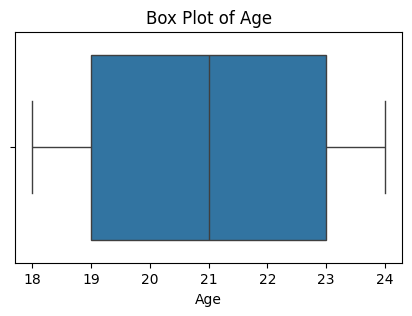

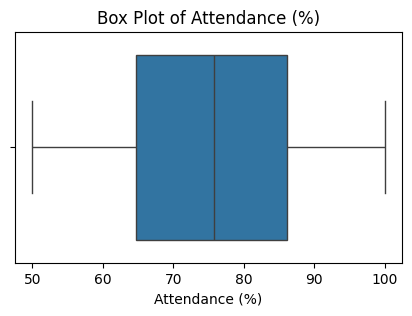

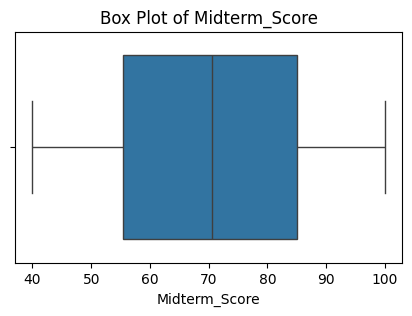

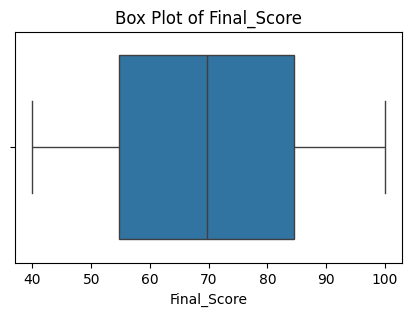

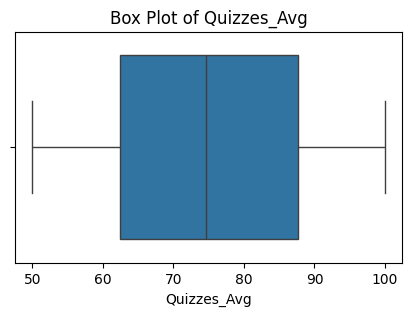

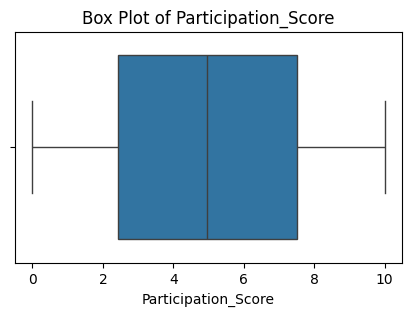

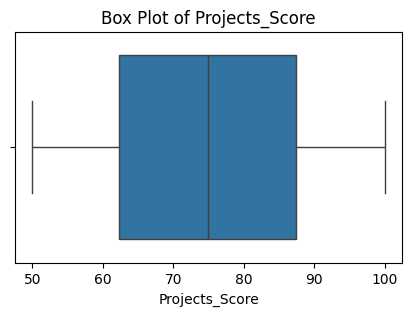

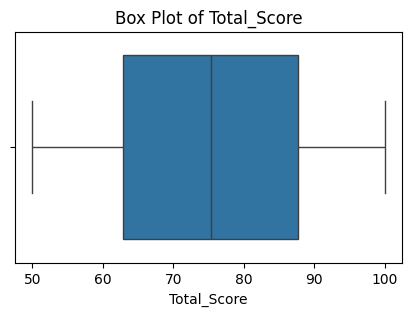

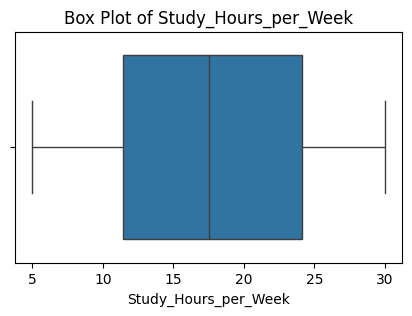

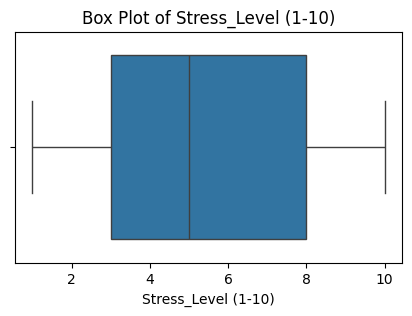

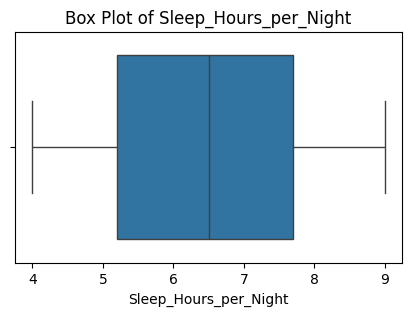

In [35]:
numerical_features = ['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score', 'Study_Hours_per_Week', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']

for col in numerical_features:
    plt.figure(figsize=(5,3))
    sns.boxplot(x = studs_df_cleaning[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

#### 🔍 As Expected outlier detection using IQR also shows Zero Outliers for all the Numericals. Therefore the data is free from outliers

In [ ]:
# list of the first Quartile for all the Numericals
Q1 = studs_df_cleaning[numerical_features].quantile(0.25)

# list of the third Quartile for all the Numericals
Q3 = studs_df_cleaning[numerical_features].quantile(0.75)

# Inter Quartile Range
IQR = Q3 - Q1

# list of outliers
outliers = ((studs_df_cleaning[numerical_features] < (Q1 - 1.5 * IQR)) | (studs_df_cleaning[numerical_features] > (Q3 + 1.5 * IQR)))
outliers.sum() # Zero Outliers

Age                      0
Attendance (%)           0
Midterm_Score            0
Final_Score              0
Quizzes_Avg              0
Participation_Score      0
Projects_Score           0
Total_Score              0
Study_Hours_per_Week     0
Stress_Level (1-10)      0
Sleep_Hours_per_Night    0
dtype: int64

#### 📌 Now we have a totally cleaned data ready for Analysis

In [ ]:
# saving the cleaned Dataset
studs_df_cleaning.to_csv('cleaned_students_data.csv', index=False)

## **3. Feature Engineering**

### 📌 Now after cleaning the data we would like to start asking questions about the data and derive insights. so the first step to do that is to Conduct a Correlation Analysis across all the data features to be able to do Multi Varient Analysis and Reveal relationships between the features

### 🛠️ To do that we need to feature Engineer some new cols that will represents the categorical data in the correlation analysis, we will start doing that by:

- Mapping Parent_Level_Education as Follows ["Not Provided": 0, "High School" : 1, "Bachelor's" : 2, "Master's" : 3 & "PhD" : 4]
- Mapping Family_Income_Level to ["Low": 1, "Medium": 2 & "High": 3]
- Also Boolean columns like Extracurricular_Activities and Internet_Access_at_Home to ["Yes": 1 and "No": 0]

In [46]:
cleaned_data = pd.read_csv(r"E:\DEPI\Technical\DEPI\Eyouth-Challenge\Student-Performance-Analysis\cleaned_students_data.csv")
studs_df_cleaned = pd.DataFrame(cleaned_data)
studs_df_cleaned.columns

Index(['Gender', 'Age', 'Department', 'Attendance (%)', 'Midterm_Score',
       'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

In [48]:
# creating a new feature as a numerical standing for the Parent_Education_Level to see correlation with other features
PEL_mask = {
    "Not Provided": 0,
    "High School" : 1,
    "Bachelor's" : 2,
    "Master's" : 3,
    "PhD" : 4,
}

bool_mask = {
    "No": 0,
    "Yes": 1
}

FIL_mask = {
    "Low": 1,
    "Medium": 2,
    "High": 3
}


studs_df_cleaned["Num_PEL"] = studs_df_cleaned["Parent_Education_Level"].map(PEL_mask)      # Parent_Education_Level Numerical Representation 
studs_df_cleaned["Num_EA"] = studs_df_cleaned["Extracurricular_Activities"].map(bool_mask)  # Extracurricular_Activities Numerical Representation
studs_df_cleaned["Num_IAH"] = studs_df_cleaned["Internet_Access_at_Home"].map(bool_mask)    # Internet_Access_at_Home Numerical Representation
studs_df_cleaned["Num_FIL"] = studs_df_cleaned["Family_Income_Level"].map(FIL_mask)         # Family_Income_Level Numerical Representation

studs_df_cleaned

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Num_PEL,Num_EA,Num_IAH,Num_FIL
0,Female,22,Engineering,52.290,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7,1,0,1,2
1,Male,18,Engineering,97.270,97.23,45.80,74.81,94.24,8.32,55.65,50.64,A,19.0,No,Yes,Not Provided,Medium,4,9.0,0,0,1,2
2,Male,24,Business,57.190,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2,3,0,1,1
3,Female,24,Mathematics,95.150,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7,1,1,1,3
4,Female,23,CS,54.180,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Male,19,Business,75.725,82.15,60.33,80.09,99.32,5.00,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3,1,0,1,1
4996,Male,19,Business,65.110,86.31,49.80,74.81,88.08,2.79,60.87,95.96,C,5.0,No,Yes,Not Provided,Medium,4,4.0,0,0,1,2
4997,Female,24,CS,87.540,63.55,64.21,94.28,50.19,3.13,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3,1,1,0,2
4998,Male,23,CS,92.560,79.79,94.28,81.20,61.18,0.40,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4,2,1,1,1


### 📌 In this section, we will convert **Stress_Level (1-10)**, **Projects_Score (0-100)**, **Midterm_Score (0-100)**, and **Final_Score (0-100)** into **categorical bins**. This helps to group the numerical values into **meaningful categories** like "Low", "Medium", "High".

To be able to **visualize** the relationship between these categories and the final `Grade`

In [159]:

# Stress Level (1-10) to Low, Medium, High
studs_df_cleaned['Stress_Level_Cat'] = pd.cut(studs_df_cleaned['Stress_Level (1-10)'],
                                bins=[0, 3, 7, 10],
                                labels=['Low', 'Medium', 'High'])

# Projects Score (0-100) to Low, Medium, High
studs_df_cleaned['Projects_Score_Cat'] = pd.cut(studs_df_cleaned['Projects_Score'],
                                  bins=[0, 50, 75, 100],
                                  labels=['Low', 'Medium', 'High'])

# Midterm Score (0-100) to Low, Medium, High
studs_df_cleaned['Midterm_Score_Cat'] = pd.cut(studs_df_cleaned['Midterm_Score'],
                                 bins=[0, 50, 75, 100],
                                 labels=['Low', 'Medium', 'High'])

# Final Score (0-100) to Low, Medium, High
studs_df_cleaned['Final_Score_Cat'] = pd.cut(studs_df_cleaned['Final_Score'],
                               bins=[0, 50, 75, 100],
                               labels=['Low', 'Medium', 'High'])
# Attendance (%) (0-100) to Low, Medium, High
studs_df_cleaned['Attendance_Cat'] = pd.cut(studs_df_cleaned['Attendance (%)'],
                               bins=[0, 50, 75, 100],
                               labels=['Low', 'Medium', 'High'])

# Show sample
studs_df_cleaned[['Stress_Level (1-10)', 'Stress_Level_Cat',
    'Projects_Score', 'Projects_Score_Cat',
    'Midterm_Score', 'Midterm_Score_Cat',
    'Final_Score', 'Final_Score_Cat',"Attendance (%)","Attendance_Cat"]].head()


,Stress_Level (1-10),Stress_Level_Cat,Projects_Score,Projects_Score_Cat,Midterm_Score,Midterm_Score_Cat,Final_Score,Final_Score_Cat,Attendance (%),Attendance_Cat
0,5,Medium,85.90,High,55.03,Medium,57.82,Medium,52.29,Medium
1,4,Medium,55.65,Medium,97.23,High,45.80,Low,97.27,High
2,6,Medium,73.79,Medium,67.05,Medium,93.68,High,57.19,Medium
3,3,Low,92.12,High,47.79,Low,80.63,High,95.15,High
4,2,Low,68.42,Medium,46.59,Low,78.89,High,54.18,Medium


## **4. Correlation Analysis**

### 📌 Understanding the relationships between different features is crucial in identifying potential factors influencing student performance. In this section, we analyze the correlation between various numerical attributes—such as attendance, study hours, and stress levels—to uncover meaningful patterns.

#### 📌 By examining correlation coefficients, we can determine which factors have a strong positive or negative impact on key performance indicators like Total Score, Midterm Score, and Assignments Average.

Let’s explore the correlations and derive actionable insights! 🔍📈

 

In [50]:
studs_corr_mat = studs_df_cleaned[['Age','Attendance (%)', 'Midterm_Score',
       'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Study_Hours_per_Week', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night', 'Num_PEL', 'Num_EA', 'Num_IAH', 'Num_FIL']].corr()

studs_corr_mat

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night,Num_PEL,Num_EA,Num_IAH,Num_FIL
Age,1.000000,0.009109,0.006502,-0.016180,-0.031418,0.007839,-0.014129,0.002401,0.017413,0.001547,-0.004474,-0.005090,-0.003881,-0.008530,0.005598,0.009379
Attendance (%),0.009109,1.000000,-0.007225,-0.024137,-0.034080,-0.027480,-0.028298,-0.012573,-0.018467,0.015437,0.011496,-0.034543,-0.000819,-0.003546,0.009381,0.011056
Midterm_Score,0.006502,-0.007225,1.000000,0.000841,-0.006974,-0.011235,-0.000836,0.014015,-0.001225,0.002456,0.020020,-0.003724,-0.012303,0.005606,0.001733,0.000203
Final_Score,-0.016180,-0.024137,0.000841,1.000000,0.010109,0.003528,0.014494,-0.003148,0.006597,0.009137,-0.000450,-0.014106,-0.016027,-0.002803,-0.013617,0.005457
Assignments_Avg,-0.031418,-0.034080,-0.006974,0.010109,1.000000,0.006847,0.013167,0.006658,0.000564,0.022199,0.010903,0.017587,0.028216,-0.008948,0.012834,-0.019492
Quizzes_Avg,0.007839,-0.027480,-0.011235,0.003528,0.006847,1.000000,-0.005416,0.005051,0.013963,0.020306,0.001508,0.002286,-0.006153,0.004542,0.019220,-0.010531
Participation_Score,-0.014129,-0.028298,-0.000836,0.014494,0.013167,-0.005416,1.000000,-0.025893,-0.034289,-0.004495,-0.006081,-0.006416,0.011222,-0.000595,-0.014269,-0.018262
Projects_Score,0.002401,-0.012573,0.014015,-0.003148,0.006658,0.005051,-0.025893,1.000000,-0.018489,0.004134,-0.015188,-0.003537,-0.014111,0.011347,0.016602,0.022016
Total_Score,0.017413,-0.018467,-0.001225,0.006597,0.000564,0.013963,-0.034289,-0.018489,1.000000,-0.012744,0.004217,0.002037,0.001970,0.005930,-0.013426,-0.028282
Study_Hours_per_Week,0.001547,0.015437,0.002456,0.009137,0.022199,0.020306,-0.004495,0.004134,-0.012744,1.000000,0.004551,-0.003365,-0.008066,0.008723,-0.006900,0.013124


### 🔍 Ploting a Heatmap to Visualize Correlation

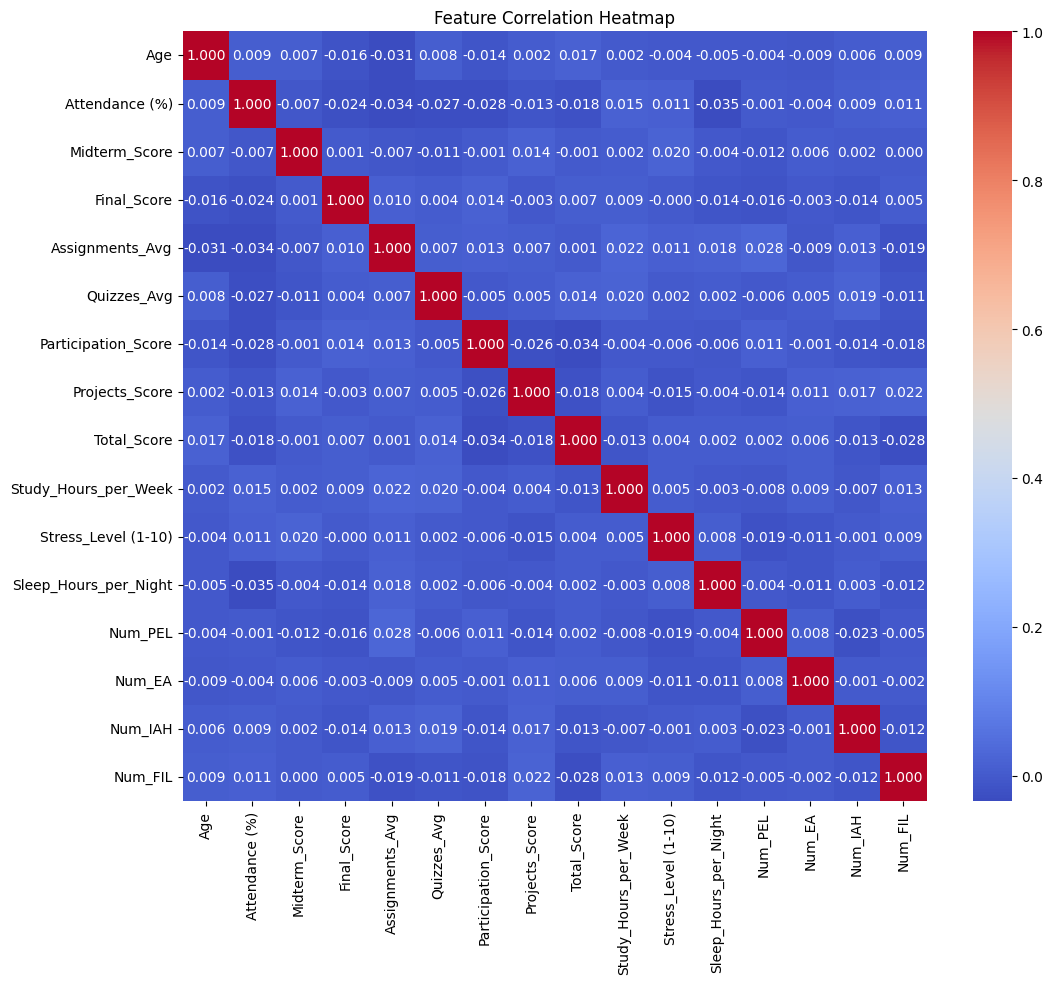

In [64]:
plt.figure(figsize=(12,10))
sns.heatmap(studs_corr_mat,annot=True, cmap='coolwarm', fmt='.3f')
plt.title("Feature Correlation Heatmap")
plt.show()

### 🔍 Observations from the Correlation Matrix shows that Most correlation values are close to 0, meaning there's no strong linear relationship between the features. Even expected relationships, like Total_Score with Midterm_Score or Final_Score, are very weak (~0.00084).

#### **A. Academic Performance**

**Assignments and Quizzes:**

- The weak correlations between `Assignments_Avg`, `Quizzes_Avg`, and `Total_Score` says that these features may not be heavily weighted in the final grade calculation.

**Midterm and Final Exams:**

- Their is a lack of correlation between `Midterm_Score` and `Final_Score` which indicate that the student performance varies across exams.

#### **B. Behavioral Factors**

**Study Hours:**

- The weak negative correlation between `Study_Hours_per_Week` and `Total_Score` suggests that more study time does not necessarily lead to better performance!

**Stress Levels:**

- The weak positive correlation between `Stress_Level (1-10)` and `Midterm_Score` suggests that some students may perform better under stress. However, but their are other effects on health should be considered.

#### **C. Extracurricular and Environmental Factors**

**Extracurricular Activities:**

- The lack of correlation between `Extracurricular_Activities` and `Total_Score` suggests that participation in extracurriculars does not harm academic performance. So we can Encourage students to maintain a balance between academics and extracurriculars.

**Internet Access:**

- The weak negative correlation between `Internet_Access_at_Home` and `Total_Score` is unexpected. this Needs Further investigaiton!

#### **D. Parental and Socioeconomic Factors**

**Parental Education:**

- The weak positive correlation between `Parent_Education_Level` and `Assignments_Avg` suggests that more educated parents may provide better support for assignments. Consider offering additional resources for students with less educated parents.

**Family Income:**

- The weak negative correlation between `Family_Income_Level` and `Total_Score` suggests that wealthier students are not necessarily performing better. Needs Further Investigation!

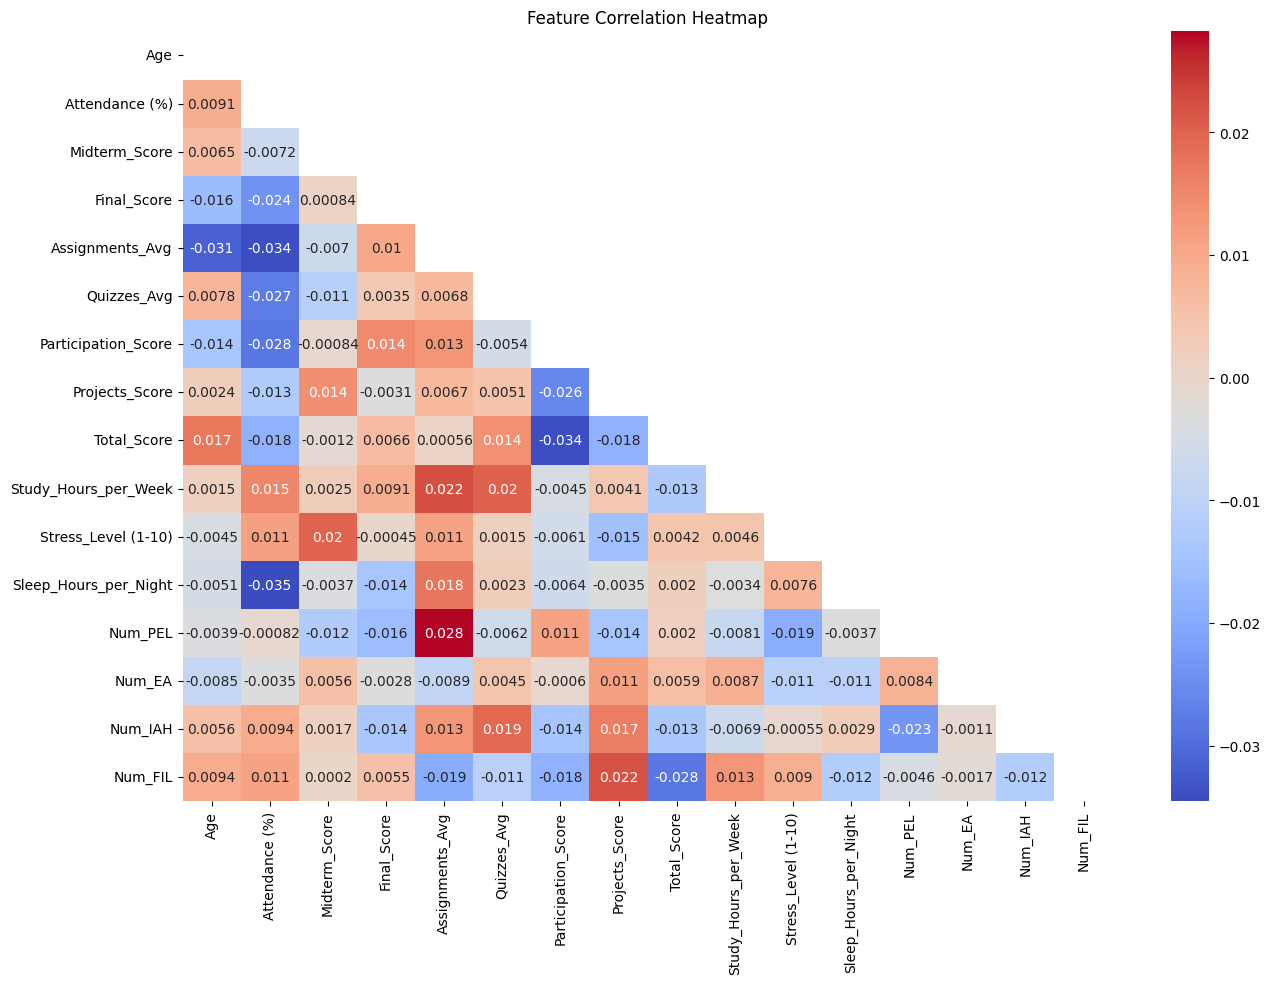

In [ ]:
# since the correlation matrix is symmetric we are going to remove redunduncies for better visualization
mat_mask = np.triu(np.ones_like(studs_corr_mat, dtype=bool))

plt.figure(figsize=(15,10))
sns.heatmap(studs_corr_mat,annot=True , cmap="coolwarm" , mask=mat_mask)
plt.title("Feature Correlation Heatmap")
plt.show()

## **5. Key Questions to Answer**

##### 📌 Understanding the factors that influence student performance is crucial for developing strategies to improve academic outcomes. In this section, we will explore key questions derived from the dataset to uncover meaningful insights. These questions are designed to guide our analysis and help us identify patterns, correlations, and actionable recommendations. By addressing these questions, we aim to provide a comprehensive understanding of the drivers of student success and highlight areas for intervention and improvement.

### **5.1 Academic Performance**

#### **1. What factors are most strongly correlated with overall academic performance (Total_Score) and how does that affect the Grade?**

In [ ]:
# overall weak correlation across all the features
studs_corr_mat["Total_Score"].sort_values()

Participation_Score     -0.034289
Num_FIL                 -0.028282
Projects_Score          -0.018489
Attendance (%)          -0.018467
Num_IAH                 -0.013426
Study_Hours_per_Week    -0.012744
Midterm_Score           -0.001225
Assignments_Avg          0.000564
Num_PEL                  0.001970
Sleep_Hours_per_Night    0.002037
Stress_Level (1-10)      0.004217
Num_EA                   0.005930
Final_Score              0.006597
Quizzes_Avg              0.013963
Age                      0.017413
Total_Score              1.000000
Name: Total_Score, dtype: float64

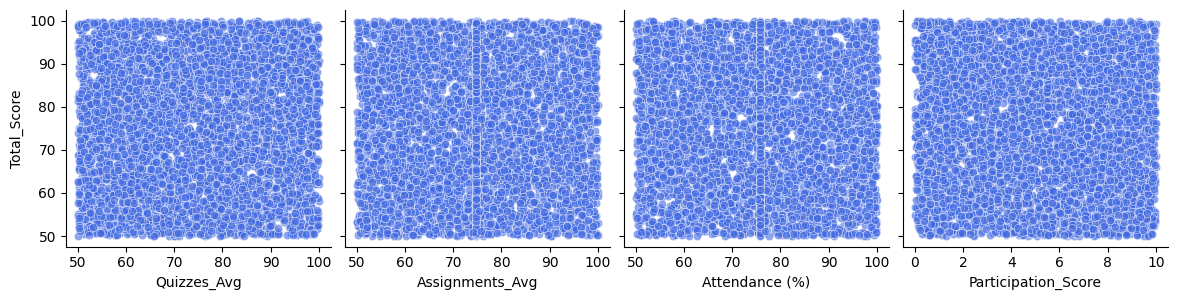

In [90]:
sns.pairplot(studs_df_cleaned, x_vars=['Quizzes_Avg', 'Assignments_Avg', 'Attendance (%)', 'Participation_Score'], y_vars=['Total_Score'], kind='scatter', height=3, aspect=1, plot_kws={'alpha':0.6, 'color':'royalblue'})
plt.show()


##### Grading Bias or Fixed Rounding Possibility
This denser line that appears in the pair Plot at specific quiz scores (e.g. 70 & 80), this suggests that students' quiz averages are often rounded or tend to cluster at certain thresholds.
Insight:

- Some teachers or grading systems may favor rounded scores rather than precise decimals.
-  There might be discrete grading bins (e.g., A = 90-100, B = 80-89, etc.), leading to more students getting common scores.

It could be a simple mode but this sharp peak suggest its Not normal!
Or this just could be because that this mode is artficially induced

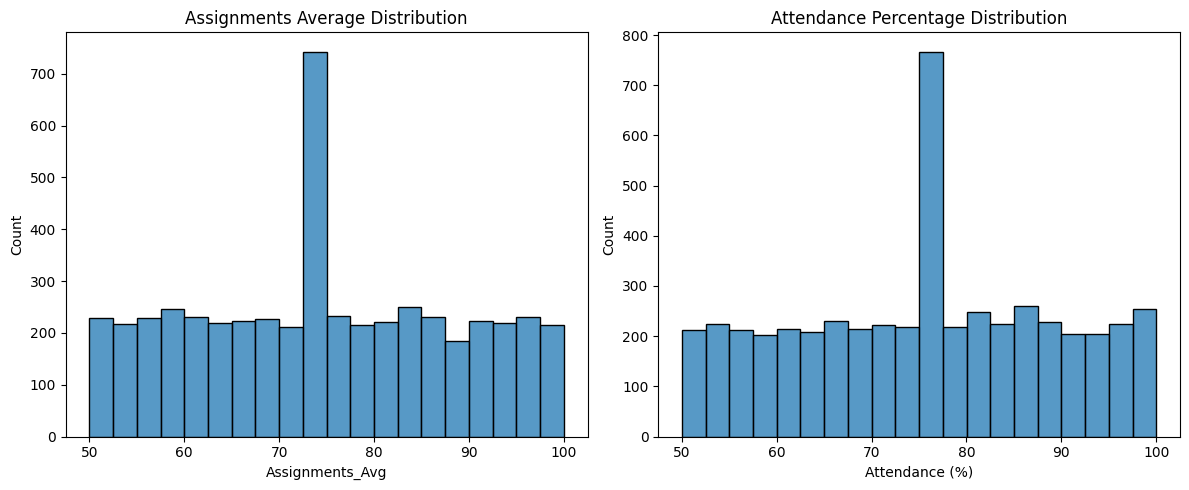

In [110]:
# its weather the dataset is flipping me Off or it has been rounded of or a constraint is doing that or its just a normal Mode!

fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # makes a grid of two locations to carry 2 charts

sns.histplot(studs_df_cleaned['Assignments_Avg'], bins=20, ax=axs[0])
axs[0].set_title('Assignments Average Distribution')

sns.histplot(studs_df_cleaned['Attendance (%)'], bins=20, ax=axs[1])
axs[1].set_title('Attendance Percentage Distribution')

plt.tight_layout()
plt.show()

##### 💡 **Insight:** There was an overall weak correlation between the Total_Score and the key features Assignments_Avg, Quizzes_Avg, Participation_Score & Projects_Score but:

- The strongest positive correlation (though still very weak) between `Total_Score `and `Quizzes_Avg` suggests that quizzes contribute significantly to the total score. This indicates that students should prioritize thorough preparation for quizzes. 

- Higher `Total_Score` strongly increases the chances of earning grades **A** or **B**.

#### **2. How do midterm and final exam scores (Midterm_Score and Final_Score) relate to each other and to overall performance?**

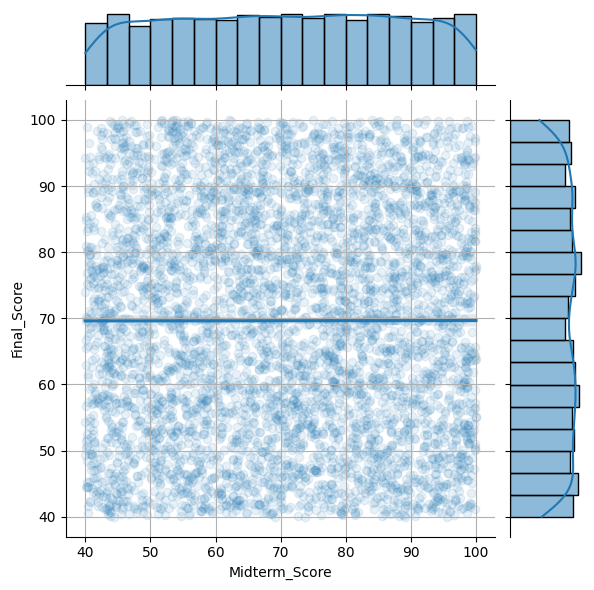

In [145]:
sns.jointplot(x=studs_df_cleaned['Midterm_Score'], y=studs_df_cleaned['Final_Score'], kind='reg', scatter_kws={'alpha':0.1})
plt.grid()
plt.show()

In [130]:
studs_df_cleaned[["Midterm_Score","Final_Score"]].corr()    # ALMOST NO CORRELATION!

,Midterm_Score,Final_Score
Midterm_Score,1.000000,0.000841
Final_Score,0.000841,1.000000


##### 💡 **Insight:** The analysis reveals that there is no significant relationship between Final_Score and Midterm_Score, with an almost negligible correlation of `0.000841`. This suggests that a student's performance in the midterm does not necessarily predict their performance in the final exam

#### **2. Do students with higher attendance (Attendance (%)) perform better academically?**

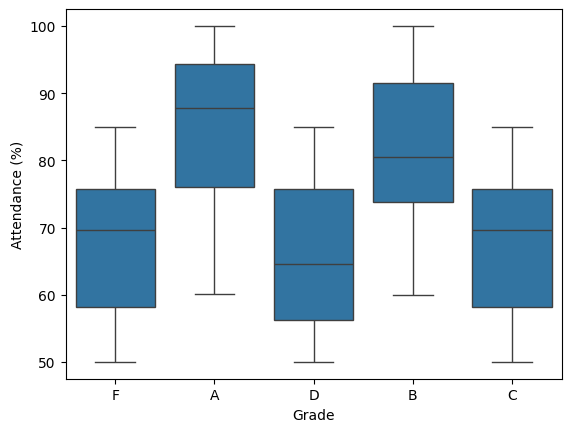

In [150]:
sns.boxplot(x="Grade", y="Attendance (%)", data=studs_df_cleaned)
plt.show()

In [151]:
studs_df_cleaned.groupby("Grade")["Attendance (%)"].mean()

Grade
A    85.490518
B    81.561830
C    68.025523
D    65.650900
F    67.958329
Name: Attendance (%), dtype: float64

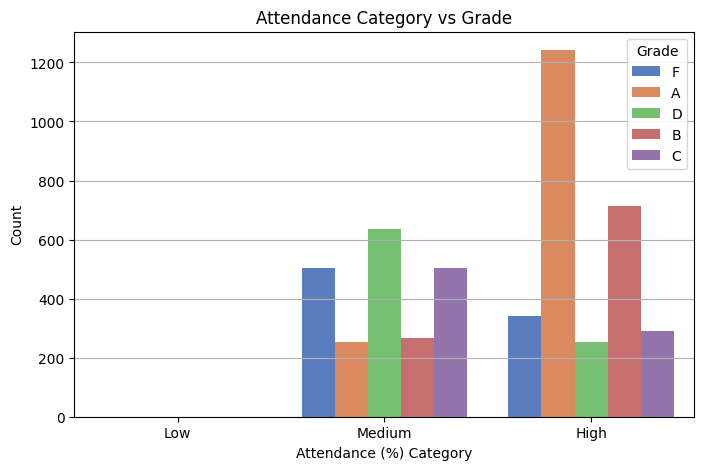

In [160]:
plt.figure(figsize=(8,5))
sns.countplot(x='Attendance_Cat', hue='Grade', data=studs_df_cleaned, palette='muted')
plt.title('Attendance Category vs Grade')
plt.xlabel('Attendance (%) Category')
plt.ylabel('Count')
plt.legend(title='Grade')
plt.grid(axis='y')
plt.show()


##### 💡 **Insight:** The analysis shows that students who achieve higher grades (A & B) have an average attendance of 81.5% to 85.4%. This suggests that maintaining a higher attendance rate is beneficial for academic performance.

### **5.2 Behavioral and Lifestyle Factors**

#### **4. Does the number of study hours per week (Study_Hours_per_Week) impact academic performance?**

In [ ]:
# Average Studying Hours For Student who got the Higher Grades
print(studs_df_cleaned[studs_df_cleaned["Grade"].isin(['A','B'])]["Study_Hours_per_Week"].mean())

# Average Studying Hours for the whole data
print(studs_df_cleaned["Study_Hours_per_Week"].mean())

17.7063890012131
17.658859999999997


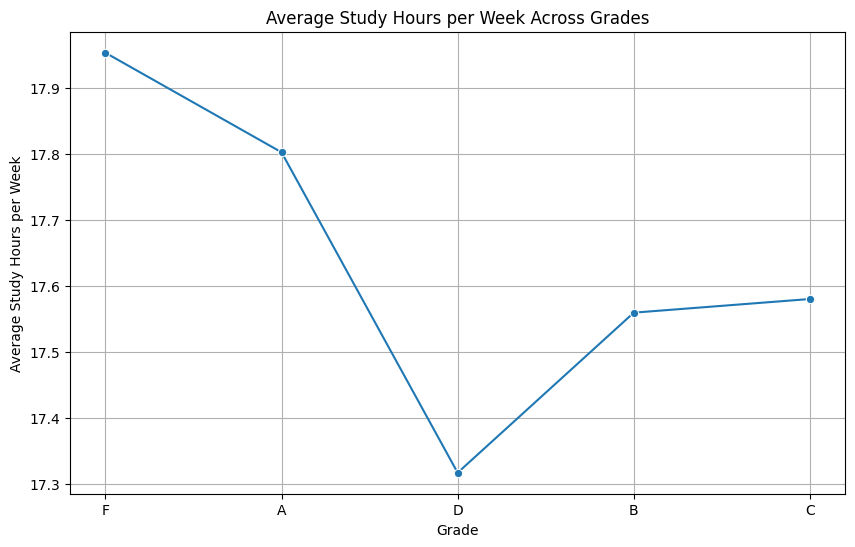

In [ ]:
# Study Hours vs Grade
plt.figure(figsize=(10, 6))
sns.lineplot(x='Grade', y='Study_Hours_per_Week', data=studs_df_cleaned, estimator='mean', marker='o', errorbar=None)
plt.title('Average Study Hours per Week Across Grades')
plt.xlabel('Grade')
plt.ylabel('Average Study Hours per Week')
plt.grid(True)
plt.show()

##### 💡 **Insight:** Simply studying more hours doesn’t necessarily lead to better grades. The effectiveness of study strategies may be more important than the number of hours spent. as
- Students who received F had the highest average study hours (~17.9 hours per week), which is unexpected.
- Students with A studied slightly less (~17.8 hours), followed by a sharp drop for students with D (~17.3 hours).
- Surprisingly, students with B and C studied more than those with D, but still less than those with F or A.

Therefore we should consider other Factors like study methods, exam strategy, and comprehension might play a bigger role.

#### **5. How does stress level (Stress_Level (1-10)) affect academic performance?**

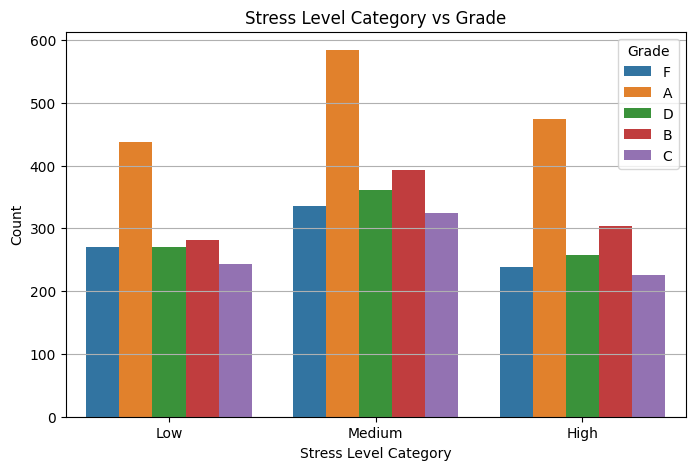

In [199]:
plt.figure(figsize=(8,5))
sns.countplot(x='Stress_Level_Cat', hue='Grade', data=studs_df_cleaned)
plt.title('Stress Level Category vs Grade')
plt.xlabel('Stress Level Category')
plt.ylabel('Count')
plt.legend(title='Grade')
plt.grid(axis='y')
plt.show()


##### 💡 **Insight:** Students experiencing a medium stress level achieved the highest number of A and B grades, suggesting that a balanced level of stress may be linked to better academic performance.
- **Low and Medium stress students are more likely to get better grades (A, B).**
- **High stress students are over-represented in lower grades like D and F.**

#### **6. Is there a relationship between sleep hours per night (Sleep_Hours_per_Night) and academic performance?**

In [ ]:
# Average Sleeping Hours for students who got the Higher Grades
print(studs_df_cleaned[studs_df_cleaned["Grade"].isin(['A','B'])]["Sleep_Hours_per_Night"].mean())

6.448847553578649


<Axes: xlabel='Grade', ylabel='Sleep_Hours_per_Night'>

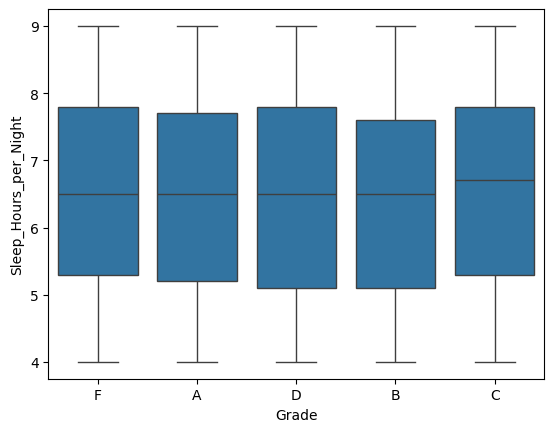

In [ ]:
sns.boxplot(x= "Grade", y= "Sleep_Hours_per_Night", data= studs_df_cleaned)

##### 💡 **Insight:** Students who got the Higher Grades slept an average of `6.4 Hrs` per Night, So Following a balanced sleep Behaviour may achieve better grades

### **5.3 Extracurricular and Environmental Factors**

#### **7. Does participation in extracurricular activities (Extracurricular_Activities) impact academic performance?**

In [214]:
studs_df_cleaned[studs_df_cleaned["Grade"].isin(["A","B"])] # 2473 is the number of students with higher grades
studs_df_cleaned[(studs_df_cleaned["Grade"].isin(["A","B"]) & (studs_df_cleaned["Extracurricular_Activities"] == "Yes"))] # 735  is the number of students with higher grades who participate in EA

higher_g_studs_EAP = (735 / 2473) * 100

studs_df_cleaned[studs_df_cleaned["Grade"].isin(["C","D","F"])] # 2527  is the number of students with Lower grades
studs_df_cleaned[(studs_df_cleaned["Grade"].isin(["C","D","F"]) & (studs_df_cleaned["Extracurricular_Activities"] == "Yes"))] # 772  is the number of students with higher grades who participate in EA
lower_g_studs_EAP = (772 / 2527) * 100

print(higher_g_studs_EAP )
print(lower_g_studs_EAP )

29.720986655883543
30.550059358923626


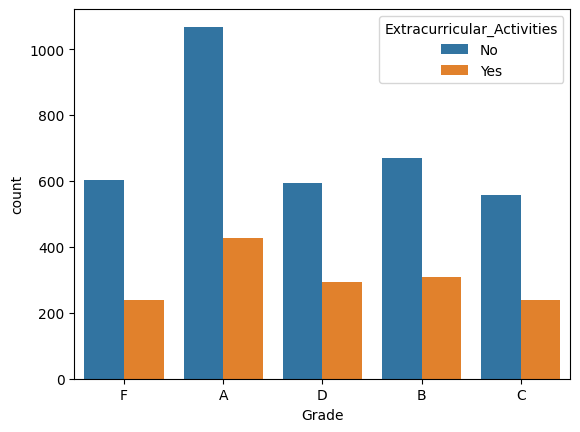

In [217]:
sns.countplot(x = "Grade", hue= "Extracurricular_Activities", data = studs_df_cleaned)
plt.show()

##### 💡 **Insight:** the Percentage of Participating Students of the Higher grades `30.55` Aprox is Near to the ones of the lower grades `29.72`, But the plot shows that the higher percentage of the A & B grade Students do not Participate in Activities. So there Might Be a bad Influence on the performance For the students who Participated in Extracurricular_Activities!

#### **8. How does internet access at home (Internet_Access_at_Home) affect academic performance?**

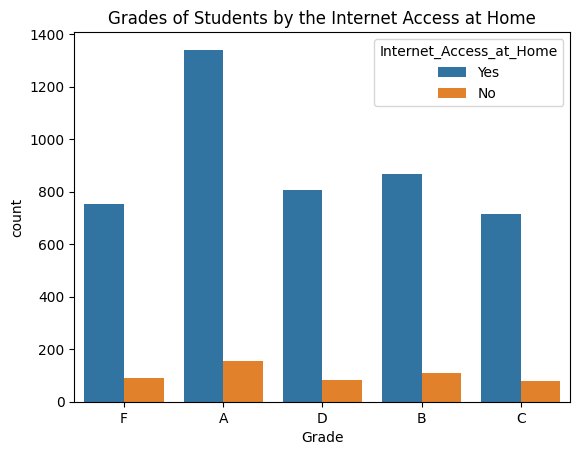

In [231]:
sns.countplot(x = "Grade", hue= "Internet_Access_at_Home", data = studs_df_cleaned)
plt.title("Grades of Students by the Internet Access at Home")
plt.show()

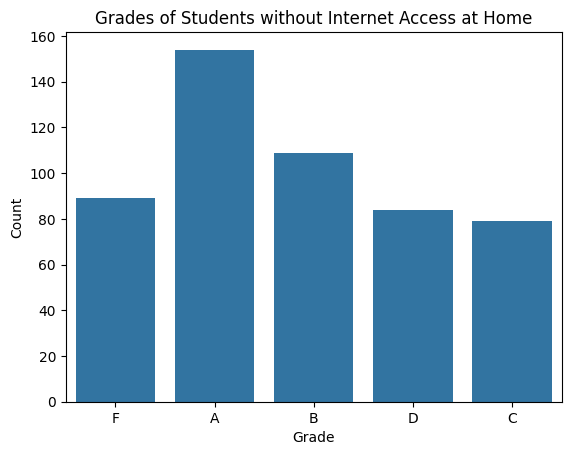

In [230]:
# Analyzing the Grades of Students who don't Have Internet Access at Home
No_Internet_Studs = studs_df_cleaned[studs_df_cleaned["Internet_Access_at_Home"] == "No"] # 515 Students

sns.countplot(x="Grade", data=No_Internet_Studs)
plt.title("Grades of Students without Internet Access at Home")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

In [234]:
# statistic comparizon
from scipy.stats import ttest_ind

group1 = studs_df_cleaned[studs_df_cleaned["Internet_Access_at_Home"] == "Yes"]["Total_Score"]
group2 = studs_df_cleaned[studs_df_cleaned["Internet_Access_at_Home"] == "No"]["Total_Score"]

t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -0.9470484462834952, P-value: 0.3439731545950624


##### 💡 **Insight:** since The p-value `(0.344)` is greater than `0.05`, meaning there is no statistically significant difference in student scores based on whether they have internet access at home. Therefore, Internet access at home does not appear to have a significant impact on student scores in this dataset. There is no strong evidence to suggest that students with internet access perform better or worse than those without. 

### **5.4 Parental and Socioeconomic Factors**

#### **9. Does parental education level (Parent_Education_Level) influence academic performance?**

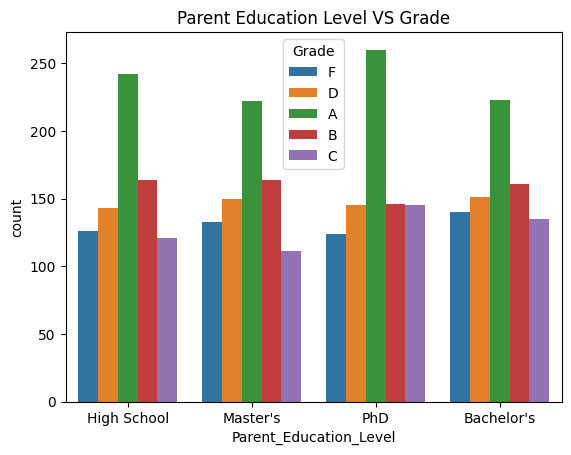

In [237]:
# filtering the Not Provided Cat

studs_filtered_PEL = studs_df_cleaned[studs_df_cleaned["Parent_Education_Level"] != "Not Provided"]
sns.countplot(x="Parent_Education_Level", hue="Grade", data = studs_filtered_PEL)
plt.title("Parent Education Level VS Grade")
plt.show()

##### 💡 **Insight:** Higher parental education levels may lead to higher student grades.

#### **10. How does family income level (Family_Income_Level) impact academic performance?**

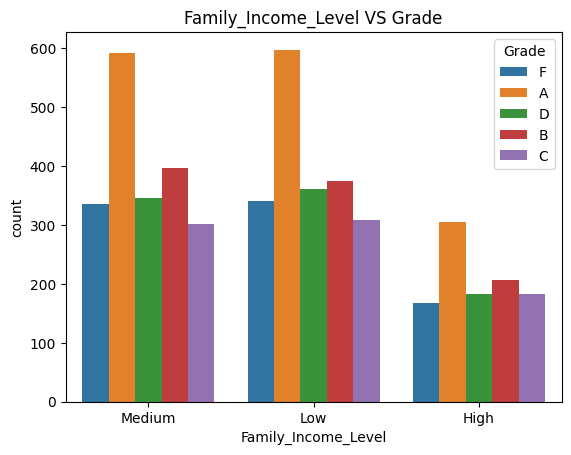

In [238]:
sns.countplot(x="Family_Income_Level", hue="Grade", data = studs_df_cleaned)
plt.title("Family_Income_Level VS Grade")
plt.show()

##### 💡 **Insight:** Students from medium- and low-income backgrounds achieved the highest grades, suggesting that income level may not be a limiting factor for academic success.

### **5.5 Department and Demographic Factors**

#### **11. Are there differences in academic performance across departments (Department)?**

In [240]:
pd.DataFrame(studs_df_cleaned.groupby("Department")["Grade"].value_counts())

count
Department  Grade       
Business    A        291
            B        197
            F        176
            C        174
            D        168
CS          A        596
            B        384
            D        366
            F        353
            C        323
Engineering A        474
            B        295
            D        258
            F        234
            C        208
Mathematics A        134
            B        102
            D         97
            C         89
            F         81

In [259]:
B_studs_count = studs_df_cleaned.query("Department == 'Business'")["Department"].count() # 1006
CS_studs_count = studs_df_cleaned.query("Department == 'CS'")["Department"].count() # 2022
E_studs_count = studs_df_cleaned.query("Department == 'Engineering'")["Department"].count() # 1469
M_studs_count = studs_df_cleaned.query("Department == 'Mathematics'")["Department"].count() # 503

# ((A Graders Count + B Graders Count) / ToTal students in the Dpt) * 100
print(f"Higher Grade Business Students Percentage: {( (291+197) / B_studs_count) *100}% " )
print(f"Higher Grade CS Students Percentage: {( (596+384) / CS_studs_count) *100}%" )
print(f"Higher Grade Engneering Students Percentage: {( (474+295) / E_studs_count) *100}%" )
print(f"Higher Grade Mathimatics Students Percentage: {( (134+102) / M_studs_count) *100}%" )


Higher Grade Business Students Percentage: 48.508946322067594% 
Higher Grade CS Students Percentage: 48.46686449060336%
Higher Grade Engneering Students Percentage: 52.34853641933288%
Higher Grade Mathimatics Students Percentage: 46.91848906560636%


##### 💡 **Insight:** The Engineering Department has the highest percentage of students achieving top grades at `52.34%`, followed by Business at `48.50%`, and Computer Science closely behind at `48.46%`.

#### **12. Do male and female students (Gender) perform differently academically?**

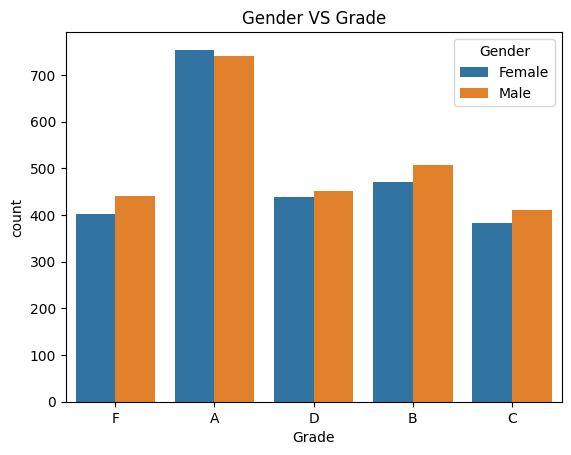

In [260]:
sns.countplot(x="Grade", hue="Gender", data = studs_df_cleaned)
plt.title("Gender VS Grade")
plt.show()

In [261]:
pd.DataFrame(studs_df_cleaned.groupby("Gender")["Grade"].value_counts())

count
Gender Grade       
Female A        754
       B        471
       D        438
       F        403
       C        383
Male   A        741
       B        507
       D        451
       F        441
       C        411

In [263]:
studs_male_count = studs_df_cleaned.query("Gender == 'Male'")["Grade"].count() # 2551
studs_female_count = studs_df_cleaned.query("Gender == 'Female'")["Grade"].count() # 2449

# ((A Graders Count + B Graders Count) / ToTal students in the Dpt) * 100
print (f"Higher Graders % form Females: {((754+471) / studs_female_count) * 100}%")
print (f"Higher Graders % form males: {((741+507) / studs_male_count) * 100}%")

Higher Graders % form Females: 50.020416496529194%
Higher Graders % form males: 48.92199137593101%


##### 💡 **Insight:** Female students demonstrate a slightly better academic performance, with 50.02% achieving higher grades, compared to 48.92% of male students.

## **6. Actionable Insights**

### **Academic Performance**
Encourage Consistent Attendance:

Students with higher attendance (81.5% to 85.4%) tend to achieve better grades. Implement strategies to improve attendance, such as:

- Regular attendance tracking and follow-ups.
- Incentivizing good attendance (e.g., rewards or recognition).

Focus on Quiz Preparation:

Quizzes have the strongest (though weak) positive correlation with Total_Score. Encourage students to prioritize quiz preparation by:

- Providing practice quizzes and study materials.
- Offering quiz-focused workshops or study groups.

Review Grading System:

The weak correlation between Assignments_Avg, Quizzes_Avg, and Total_Score suggests that these components may not be weighted effectively. Consider:

- Re-evaluating the grading system to ensure all components contribute meaningfully to the final grade.
- Increasing the weight of quizzes and assignments if they are strong predictors of performance.

### **Behavioral and Lifestyle Factors**
Promote Effective Study Habits:

Students with higher grades do not necessarily study more hours, suggesting that study quality matters more than quantity. Encourage:

- Time management and active learning techniques.
- Workshops on effective study strategies (e.g., spaced repetition, active recall).

Manage Stress Levels:

Students with medium stress levels perform better than those with high or low stress. Implement stress management programs, such as:

- Counseling services and stress-relief workshops.
- Encouraging a balanced workload to avoid burnout.

Encourage Healthy Sleep Habits:

Students who sleep an average of 6.4 hours per night tend to perform better. Promote healthy sleep habits by:

- Educating students on the importance of sleep.
- Avoiding late-night assignments or exams.

### **Extracurricular and Environmental Factors**
Balance Extracurricular Activities:

While extracurricular activities do not harm academic performance, students who participate less tend to achieve higher grades. Encourage:

- A balanced approach to extracurriculars, ensuring they do not interfere with academic responsibilities.
- Time management workshops for students involved in extracurriculars.

Leverage Internet Access:

Internet access at home does not significantly impact performance, but it can be a valuable resource. Ensure:

- All students have access to online learning materials and resources.
- Training on how to use the internet effectively for academic purposes.

### **Parental and Socioeconomic Factors**
Support Students with Less Educated Parents:

Students with more educated parents tend to perform slightly better. Provide additional support for students with less educated parents, such as:

- Mentorship programs.
- Workshops for parents on how to support their children’s education.

Address Income Disparities:

Students from low- and medium-income families perform well, but targeted support can help bridge any gaps. Consider:

- Scholarships or financial aid for low-income students.
- Free or subsidized access to academic resources (e.g., textbooks, online courses).

### **Department and Demographic Factors**
Department-Specific Interventions:

The Engineering Department has the highest percentage of top-performing students (52.34%). Share best practices from this department with others, such as:

- Collaborative learning initiatives.
- Department-specific tutoring or mentoring programs.

Gender-Specific Support:

Female students slightly outperform male students (50.02% vs. 48.92%). Address any gender-specific challenges by:

- Offering tailored academic support for male students.
- Encouraging male students to participate in study groups or mentorship programs.

### **General Recommendations**
Regular Performance Reviews:

Conduct regular reviews of student performance to identify at-risk students early. Use data-driven insights to provide targeted interventions.

Enhance Student Engagement:

Increase student engagement through interactive teaching methods, such as:

- Group projects and discussions.
- Gamification of learning activities.

Feedback and Improvement:

Collect feedback from students on teaching methods and course content. Use this feedback to continuously improve the learning experience.


## **Summary**

#### 🎯 **This analysis has uncovered several key factors influencing student performance, including attendance, study habits, stress levels, and parental education. By implementing the actionable insights outlined above, educational institutions can create a supportive environment that fosters academic success and helps students achieve their full potential. The findings also highlight the importance of a balanced approach to academics, extracurriculars, and personal well-being.**






<p style="text-align: center; font-weight: 600; font-Size:1.5rem;", >Thanks for Reading</p>